# (Ford GoBike System Data)
## by: REEM ALRASHOUD

## Investigation Overview

> My basic goal is : To explore the dataset and find a spesific relationships between some variables that can provide the needed visualization between them. Also , try to Discover What are the features affecting trip duration at the most level.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco.The Data set contains trip data of users in San Francisco Bay Area.There are 519,702 rows of trip in the dataset. Most variables are numeric in nature, but the variables user_type,end and start station names are cateogrical in nature.An important variables is the duration of the trip in seconds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_dataset= pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df_dataset.start_time = pd.to_datetime(df_dataset.start_time)
df_dataset.end_time = pd.to_datetime(df_dataset.end_time)
df_dataset['month'] = df_dataset.start_time.dt.strftime('%b')
df_dataset['day'] = df_dataset.start_time.dt.strftime('%a')
df_dataset.drop(axis=1, columns=['start_time','end_time'], inplace=True)

## (Visualization 1: Distirbution of the trip duration)

> The plot it seems as Right-Skewed.The duration frequency is decreased after a high point of values which is make a very long data tail.The most Frequency duration is around 400.

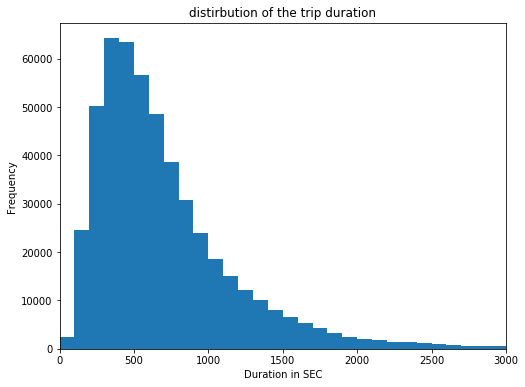

In [4]:
binss = np.arange(0, df_dataset['duration_sec'].max()+100, 100);
plt.figure(figsize = [8,6])
plt.hist(data = df_dataset, x = 'duration_sec', bins = binss)
plt.xlim(0,3000)

plt.title("distirbution of the trip duration")
plt.xlabel("Duration in SEC")
plt.ylabel("Frequency")
plt.show();

## (Visualization 2: Top 10 End station names)

> After we summrize the most 10 popular end station names , we Find a group of them such as : San Francisco Caltrain, San Francisco Ferry Building, The Embarcadero at Sansome St, San Francisco Caltrain Station 2, Montgomery St BART Station, Market St at 10th St, Powell St BART Station, Berry St at 4th St, Steuart St at Market St, and Powell St BART Station.All of them have a high popularity which is above 7500.

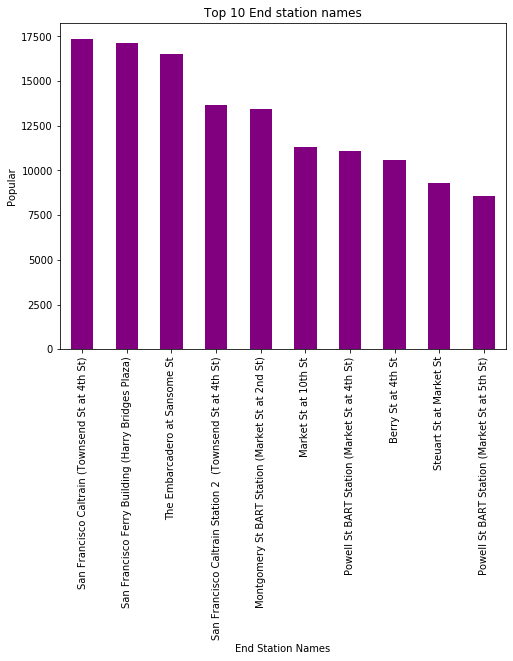

In [5]:
Top_names=df_dataset['end_station_name'].value_counts().nlargest(10)
Top_names.plot(kind='bar',figsize=(8,6) ,color="Purple")
plt.xticks(rotation=90)

plt.xlabel('End Station Names')
plt.ylabel('Popular')
plt.title('Top 10 End station names');
plt.show()

## (Visualization 3: Relationship between duration and user type)

> The plot Present that the Customer (Casual) type has longest duration , however the subscriber (Member) has most popularity. We can conclude that the count of Customers is much more than the Subscribers. One interesting insight obtained here is that the Subscribers have a tendency to rent out the bikes for shorter trips.

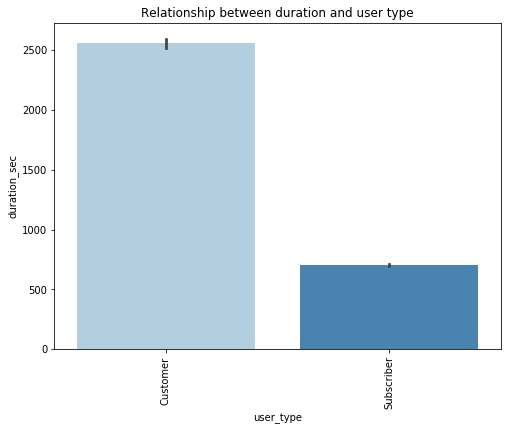

In [6]:
plt.figure(figsize = [8,6])
sb.barplot(data = df_dataset, x = 'user_type', y = 'duration_sec', palette = 'Blues')
plt.xticks(rotation=90)

plt.title('Relationship between duration and user type');
plt.show()

## (Visualization 4: Duration and user type per days)
> There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.About the other days the Usage of bike is normal at moderate level.As we can see Sunday is around 1750 , Saturday is around 1600 , and the other weekdays are near from 1000 seconds.

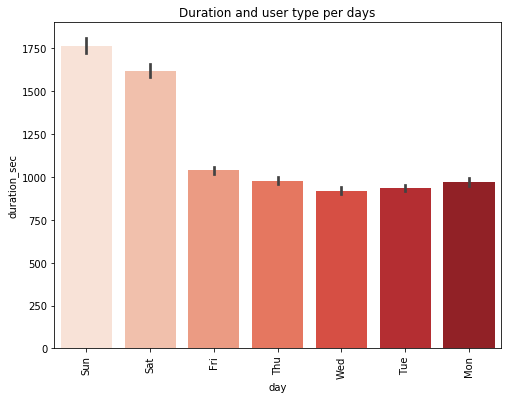

In [7]:
plt.figure(figsize = [8, 6])
sb.barplot(data = df_dataset, x = 'day', y = 'duration_sec', palette = 'Reds')
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

## (Visualization 5: Trip duartion across user type in different days)
> From the Investigation, the customer type has the longer trips duration Especially in the sunday which is around 3000. However, the subscriber it is so low and the most highest duration in sunday which less than 1000 seconds.

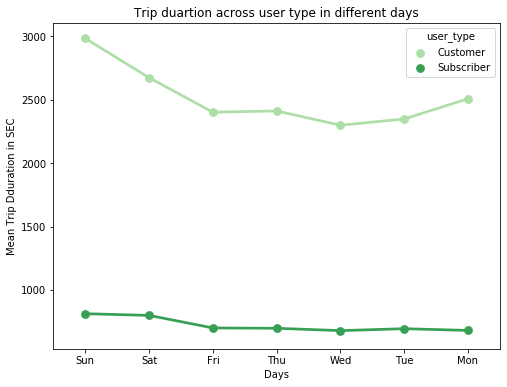

In [8]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dataset, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'Greens', ci=None)

plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration in SEC')
plt.xlabel('Days')
plt.show();

## (Visualization 6: Duration per month for every day)
> As we can see for each month there is a special day which is has the longest duration. (December->Sunday), (November->Saturday), (October->Sunday), (September->Sunday), (August->Sunday), (July->Sunday), and (June->Wednesday).

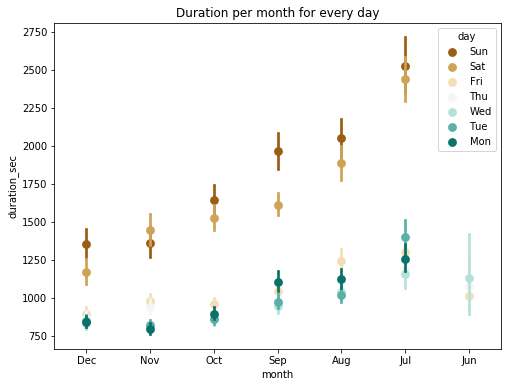

In [9]:
plt.figure(figsize=[8,6])
sb.pointplot(data=df_dataset,x='month',y='duration_sec',hue='day',linestyles='',palette='BrBG')

plt.title("Duration per month for every day");

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 433310 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server


## Summary
> From the above plots we can conclude some point:

> * The duration frequency is decreased after a high point of values which is make a very long data tail.
> * The most 10 popular end station names have a high popularity which is above 7500.
> * The Customer (Casual) type has longest duration , however the subscriber (Member) has most popularity.
> * There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.
> * The customer type has the longer trips duration Especially in the sunday which is around 3000.
> * For each month there is a special day which is has the longest duration.